# Introduction to Raster Data with `rasterio`: Part 4, Raster to Vector, and Back Again

- The title says it all: We'll first go from a raster to a vector (shape)
- Then, we'll go from a vector to a raster!

In [691]:
#Import our basic libraries

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd

import seaborn as sns

In [692]:
#Import our basic rasterio stuff
########

import rasterio
from rasterio.plot import show
import rasterio.mask

In [693]:
#And we'll need this:

from rasterio import features


In [694]:
import warnings
warnings.filterwarnings("ignore")

## Raster to Vector Operations

#### From Raster to Shape:

- The following demonstrates the process for going from a raster to a shape...

- To make things run a little faster, we'll use the lower resolution 10m raster files.

In [695]:
#Just get our raster once again:
#####

with rasterio.open('USA_Mean_Temp_10minutes.tif') as src:
    raster_map = src.read(1, masked=True)

raster_map

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.4e+38,
  dtype=float32)

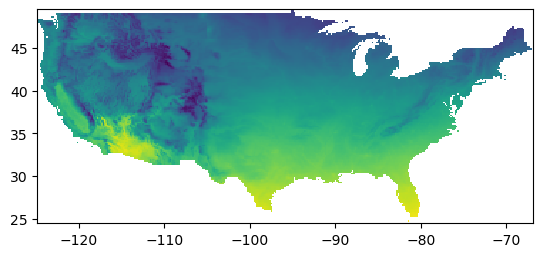

In [696]:
#Everything went super?
###

show(raster_map, transform=src.transform, interpolation='none');

#### Now, just make a vector from the overall shape!

- We'll set everything not masked to 1:

In [697]:
#Make a copy as a helper:
#######

raster_map2 = raster_map.copy()

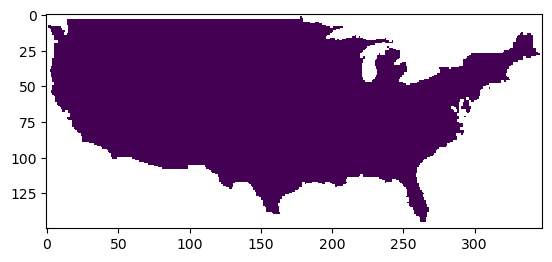

<AxesSubplot: >

In [708]:
#And set everything not in the mask to 1
raster_map2[~raster_map2.mask] = 1

#Check:
show(raster_map2)

In [709]:
#Now, create our shape: This is a *generator*
#####

#Note that "mask" is the negations of raster_map2.mask!
raster_shape = features.shapes(raster_map2, mask=~raster_map2.mask) #, transform=src.transform)

In [710]:
#See, a generator:
raster_shape

<generator object shapes at 0x0000020F502E5820>

In [729]:
#Run this cell a few times to see all the polygons created:

x = next(raster_shape)
x

StopIteration: 

In [775]:
##Let's make some polygons:
#Re-make our generator
raster_shape = features.shapes(raster_map2, mask=~raster_map2.mask) #, transform=src.transform)


POLYGON ((178 1, 180 1, 180 2, 181 2, 181 5, 186 5, 186 6, 188 6, 188 5, 192 5, 192 6, 194 6, 194 7, 197 7, 197 8, 200 8, 200 9, 201 9, 201 8, 209 8, 209 9, 211 9, 211 10, 207 10, 207 11, 204 11, 204 12, 202 12, 202 13, 201 13, 201 14, 200 14, 200 15, 198 15, 198 16, 197 16, 197 17, 199 17, 199 16, 203 16, 203 15, 204 15, 204 17, 206 17, 206 18, 207 18, 207 17, 210 17, 210 16, 214 16, 214 15, 216 15, 216 14, 218 14, 218 13, 219 13, 219 12, 223 12, 223 13, 220 13, 220 14, 219 14, 219 15, 221 15, 221 16, 223 16, 223 17, 225 17, 225 18, 231 18, 231 17, 237 17, 237 16, 239 16, 239 18, 241 18, 241 19, 242 19, 242 18, 244 18, 244 20, 245 20, 245 21, 241 21, 241 23, 242 23, 242 22, 243 22, 243 23, 244 23, 244 24, 246 24, 246 25, 249 25, 249 31, 248 31, 248 32, 247 32, 247 33, 246 33, 246 34, 245 34, 245 35, 248 35, 248 34, 249 34, 249 33, 253 33, 253 36, 254 36, 254 42, 253 42, 253 41, 252 41, 252 43, 250 43, 250 45, 249 45, 249 46, 248 46, 248 47, 251 47, 251 48, 253 48, 253 49, 255 49, 255 

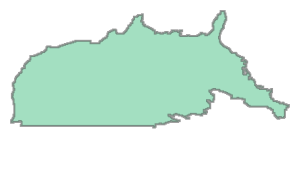

POLYGON ((14 8, 14 9, 15 9, 15 8, 14 8))


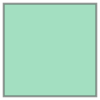

POLYGON ((12 10, 12 11, 13 11, 13 10, 12 10))


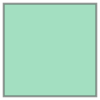

POLYGON ((14 10, 14 13, 15 13, 15 10, 14 10))


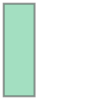

POLYGON ((13 13, 13 14, 14 14, 14 13, 13 13))


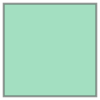

POLYGON ((218 15, 218 16, 219 16, 219 15, 218 15))


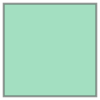

POLYGON ((203 17, 203 18, 204 18, 204 17, 203 17))


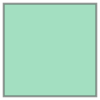

POLYGON ((6 19, 6 20, 8 20, 8 19, 6 19))


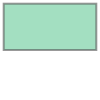

POLYGON ((236 20, 236 21, 231 21, 231 22, 230 22, 230 23, 229 23, 229 22, 228 22, 228 23, 226 23, 226 24, 225 24, 225 25, 224 25, 224 26, 223 26, 223 27, 222 27, 222 28, 221 28, 221 30, 222 30, 222 29, 223 29, 223 28, 225 28, 225 29, 224 29, 224 32, 223 32, 223 35, 222 35, 222 44, 223 44, 223 46, 224 46, 224 47, 228 47, 228 46, 229 46, 229 45, 230 45, 230 44, 231 44, 231 42, 232 42, 232 39, 231 39, 231 37, 230 37, 230 32, 231 32, 231 31, 232 31, 232 28, 233 28, 233 27, 235 27, 235 28, 237 28, 237 25, 240 25, 240 24, 238 24, 238 23, 239 23, 239 22, 240 22, 240 21, 237 21, 237 20, 236 20))


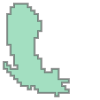

POLYGON ((335 30, 335 31, 336 31, 336 30, 335 30))


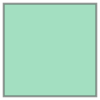

POLYGON ((295 59, 295 60, 296 60, 296 59, 295 59))


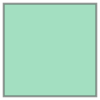

POLYGON ((291 60, 291 62, 290 62, 290 67, 291 67, 291 64, 292 64, 292 61, 293 61, 293 60, 291 60))


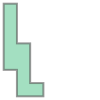

POLYGON ((285 65, 285 66, 286 66, 286 65, 285 65))


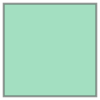

POLYGON ((286 66, 286 67, 287 67, 287 66, 286 66))


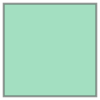

POLYGON ((287 67, 287 68, 288 68, 288 67, 287 67))


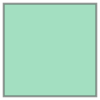

POLYGON ((14 68, 14 70, 15 70, 15 68, 14 68))


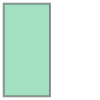

POLYGON ((15 70, 15 72, 16 72, 16 70, 15 70))


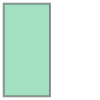

POLYGON ((289 70, 289 71, 290 71, 290 70, 289 70))


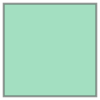

POLYGON ((221 113, 221 114, 220 114, 220 115, 222 115, 222 113, 221 113))


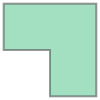

POLYGON ((253 129, 253 131, 254 131, 254 129, 253 129))


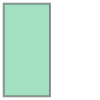

In [792]:
#We can make a polygon from these...
#######

from shapely.geometry import Polygon


x = next(raster_shape)

#Note there are many polygons:
for i in x[0]['coordinates']:

    p = Polygon(i)
    print(p)
    display(p)

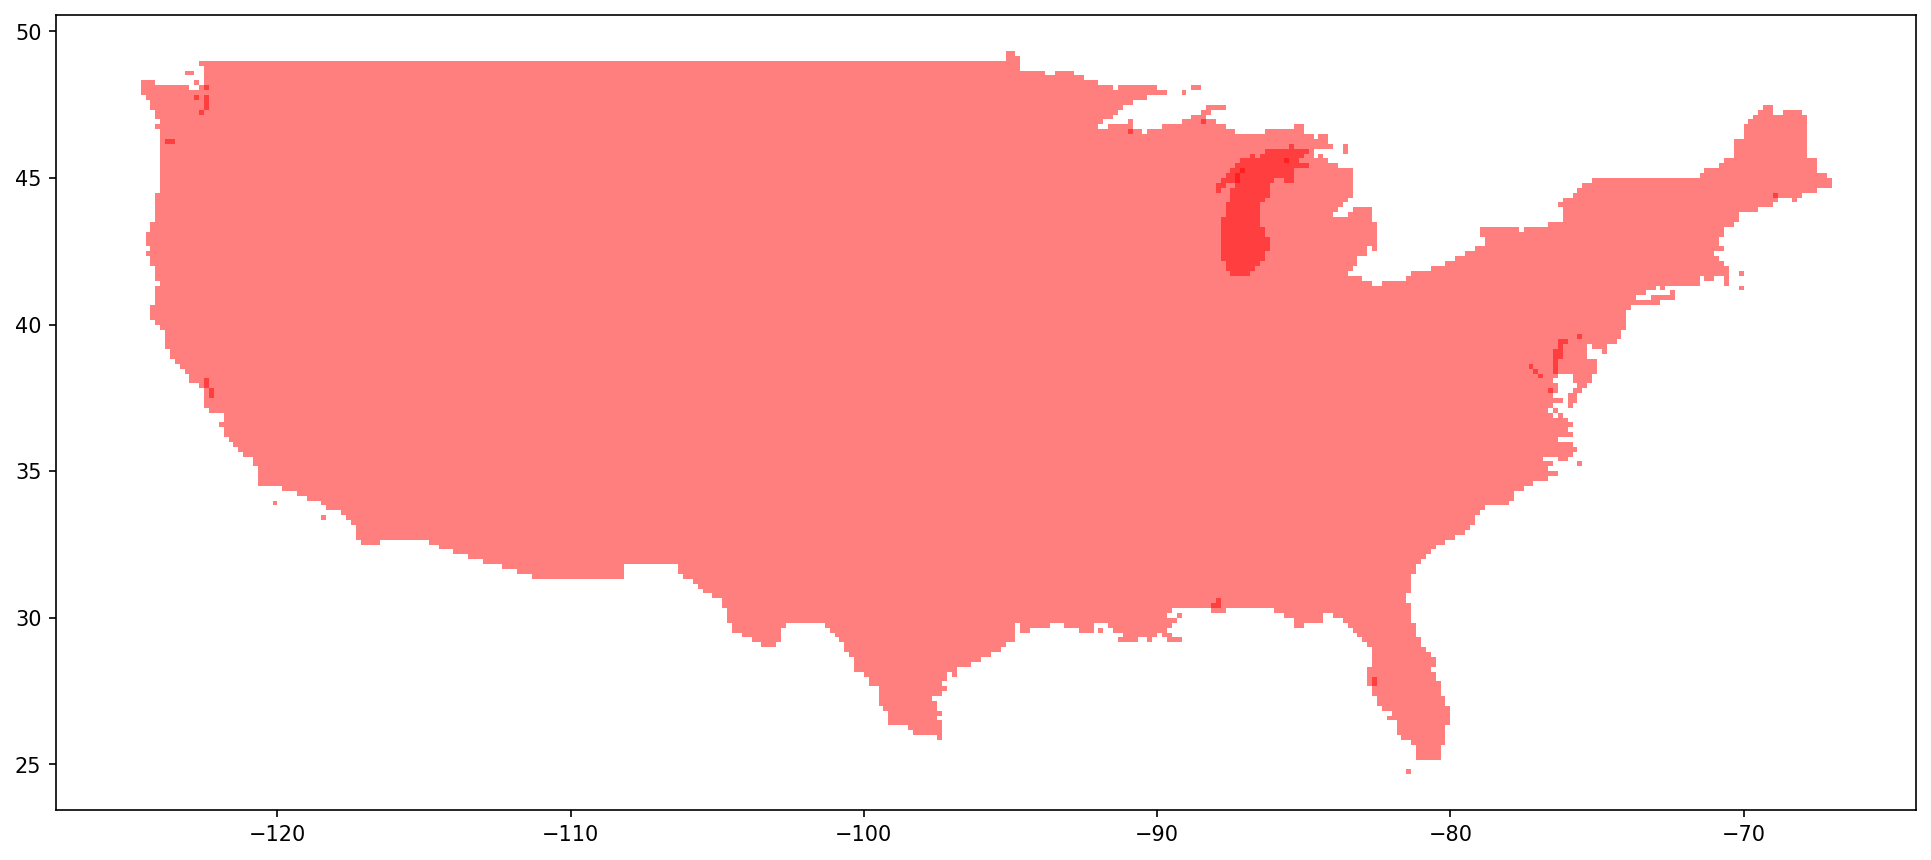

In [796]:
#Let's plot all our shapes
###########

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
#ax1 = ax1.flatten()

raster_shape = features.shapes(raster_map2, mask=~raster_map2.mask, transform=src.transform)


for i, x in enumerate(raster_shape):
        
    for i2, k in enumerate(x[0]['coordinates']):
 
        #Turn to polygon
        p = Polygon(k)
        

        #Cast as GeoDataFrame
        p2 = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[1])

        
        #And plot:
        #We are including interior stuff here:
        p2.plot(ax=ax1, alpha=.5, facecolor='red')
    

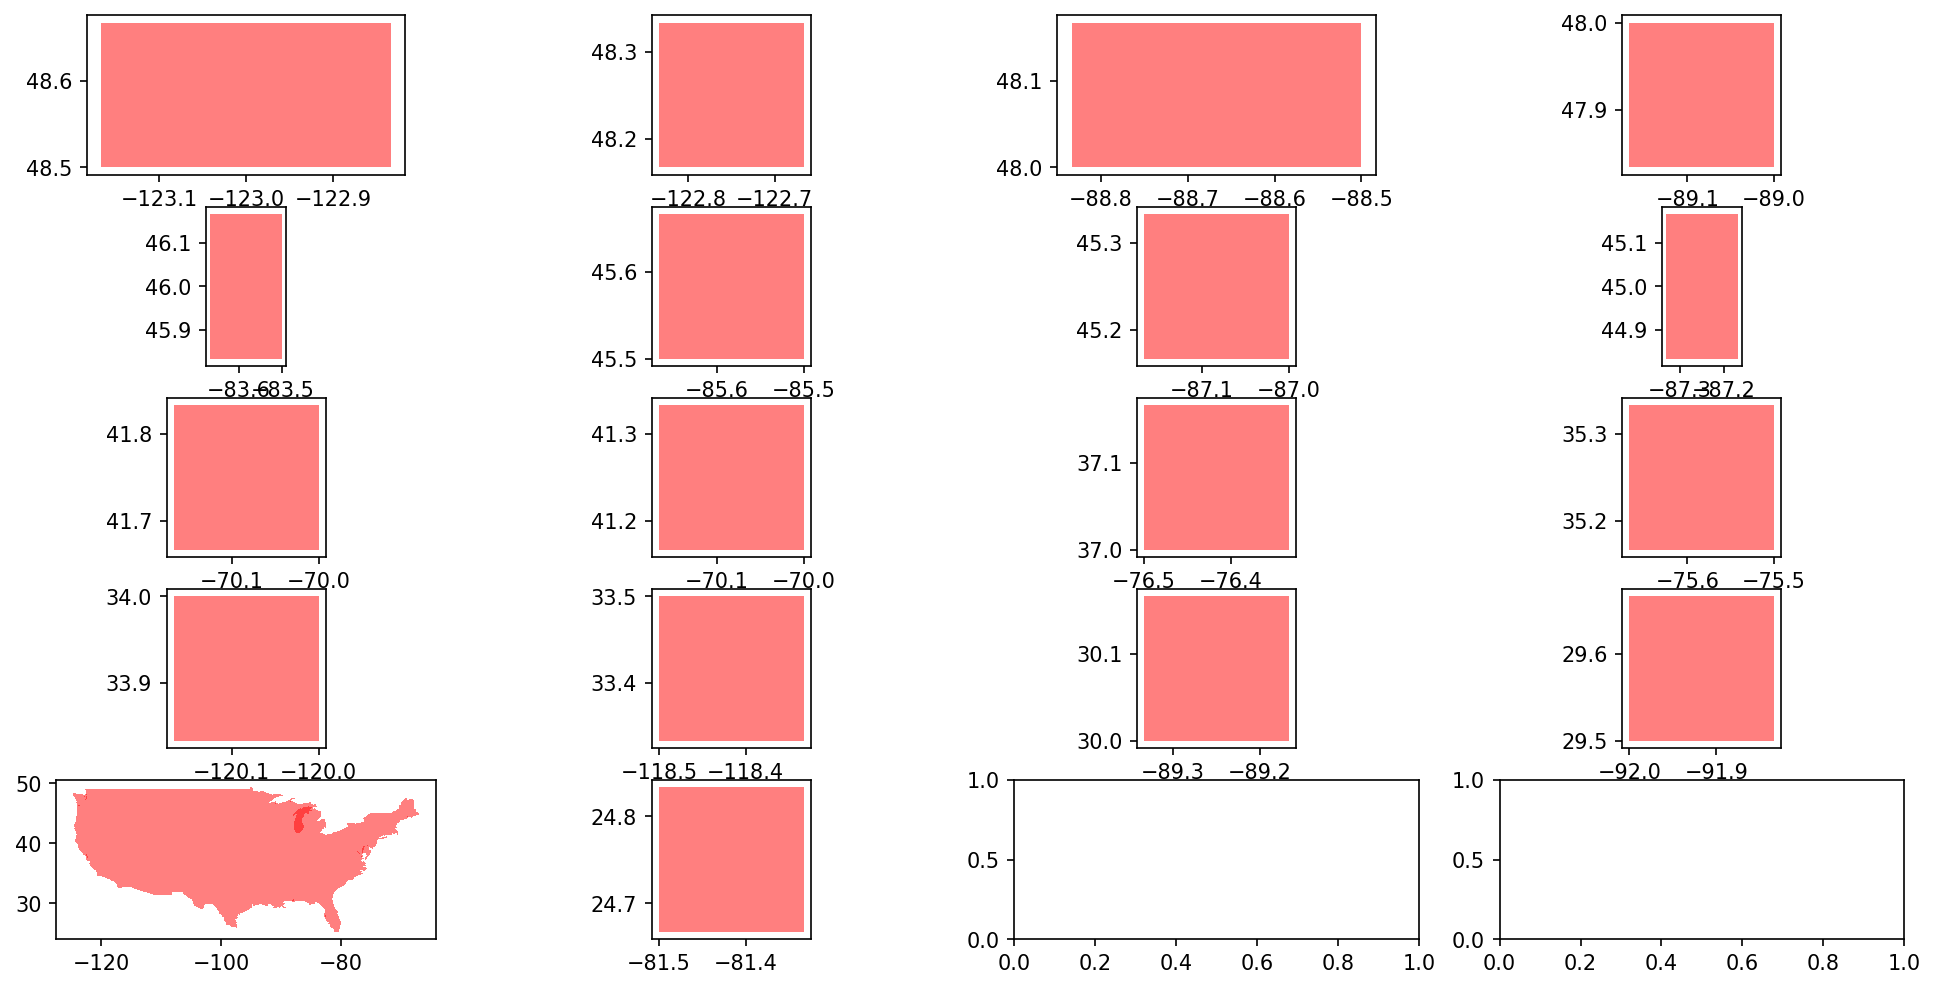

In [734]:
#Let's plot all our shapes
###########

fig, ax1 = plt.subplots(5, 4, figsize=(16, 8), dpi=150)
ax1 = ax1.flatten()

raster_shape = features.shapes(raster_map2, mask=~raster_map2.mask, transform=src.transform)


for i, x in enumerate(raster_shape):
        
    for i2, k in enumerate(x[0]['coordinates']):
 
        #Turn to polygon
        p = Polygon(k)
        

        #Cast as GeoDataFrame
        p2 = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[1])

        
        #And plot:
        #We are including interior stuff here:
        p2.plot(ax=ax1[i], alpha=.5, facecolor='red')
    

#### Need to subtract off interior polygons!

- First polygon in list is exterior
- Everything after is interior
- We can use an overlay operation (difference) to subtract off these interiors
- Behold!

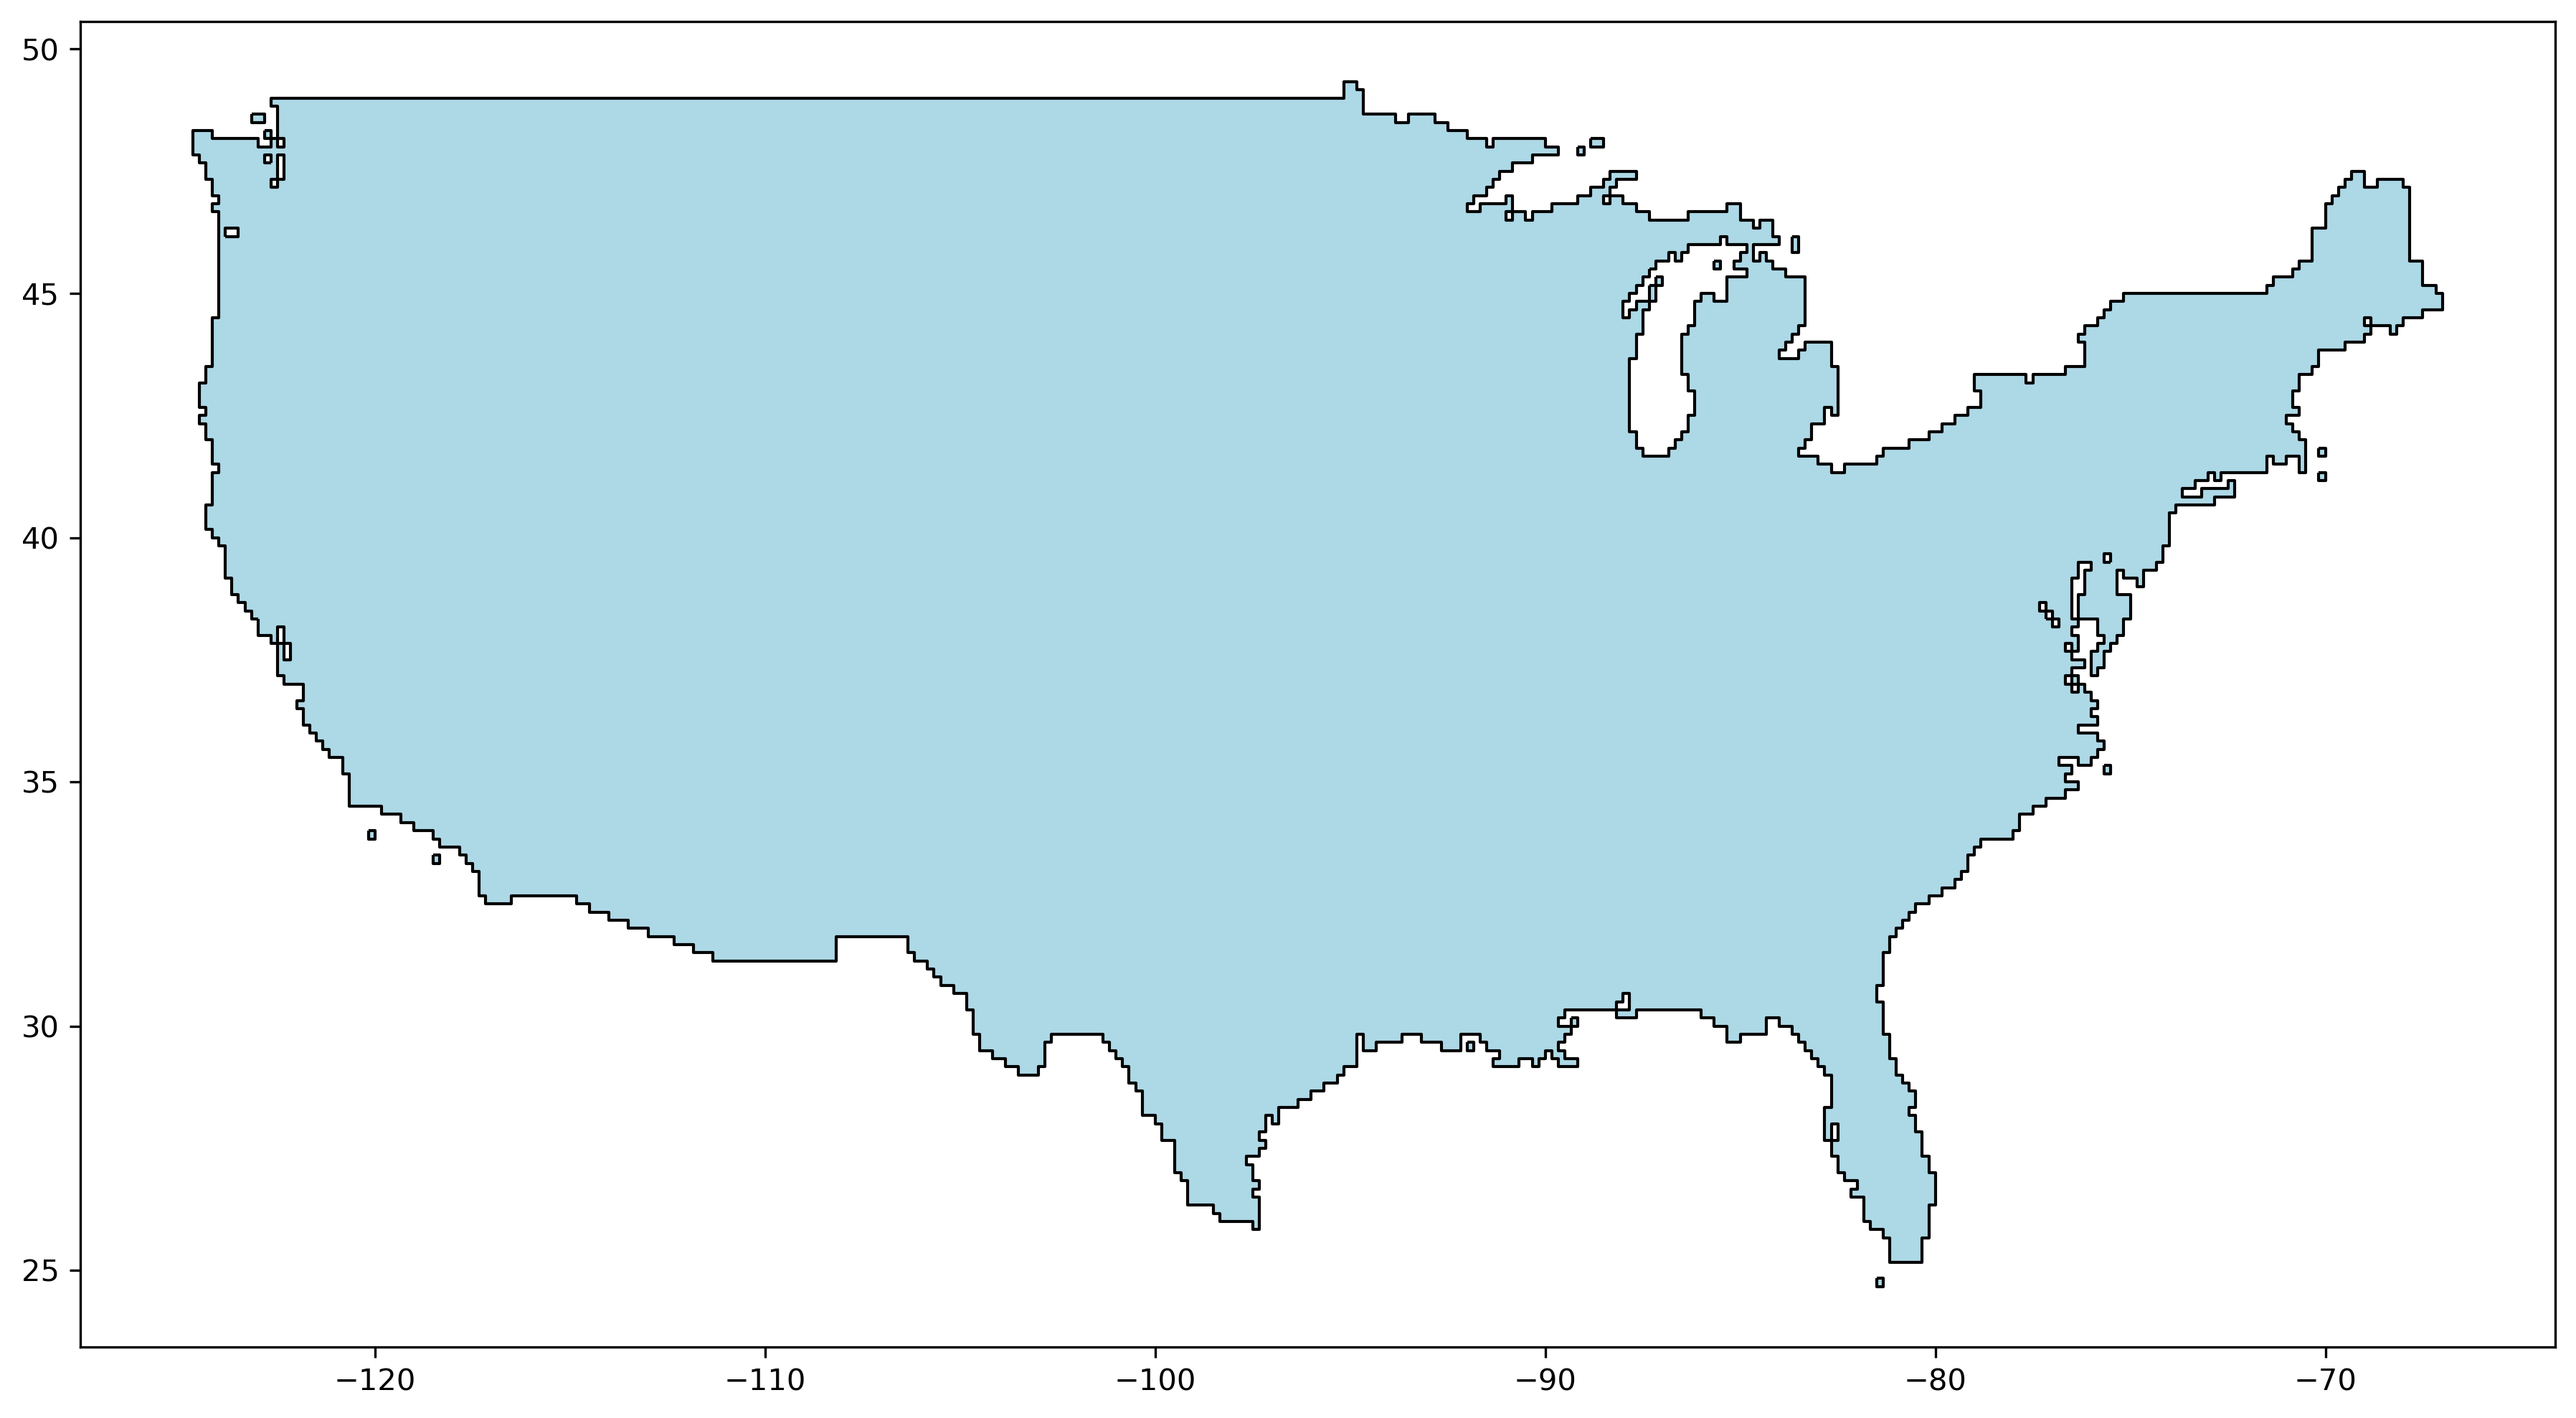

In [798]:
# Use GeoPandas to build up a geodataframe
# Use overlay difference to subtract off interiors
###

#Get our generator
raster_shape = features.shapes(raster_map2, mask=~raster_map2.mask, transform=src.transform)

#Make an empty GeoDataFrame:
gdf = gpd.GeoDataFrame(columns={'geometry':[]}, crs=4326)


#Iterate through the shapes
for x in raster_shape:
    
    #If i > 0, then an interior polygon to subtract off
    for i, k in enumerate(x[0]['coordinates']):
            
        #Make polygon
        p = Polygon(k)
        
        #If i > 0, then we are subtracting off geometries, and already made p_master
        if (i == 0):
            #Make p_master:
            p_master = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[i], crs=4326)
        else:
            #Subtract off an interior polygon:
            df_subtract = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[i], crs=4326)
            p_master = p_master.overlay(df_subtract, how='difference')

            
        #Only append to gdf if last iteration:
        if (i == len(x[0]['coordinates']) - 1):
            gdf = gdf.append(p_master)

#Can plot our final result!
#########

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=300)
gdf.plot(ax=ax1, facecolor='lightblue', linewidth=1, edgecolor='black', alpha=1);


In [799]:
#And what did we build?
gdf

,geometry,val
0,"POLYGON ((-123.16667 48.66667, -123.16667 48.5...",1.0
0,"POLYGON ((-122.83333 48.33333, -122.83333 48.1...",1.0
0,"POLYGON ((-88.83333 48.16667, -88.83333 48.000...",1.0
0,"POLYGON ((-89.16667 48.00000, -89.16667 47.833...",1.0
0,"POLYGON ((-83.66667 46.16667, -83.66667 45.833...",1.0
0,"POLYGON ((-85.66667 45.66667, -85.66667 45.500...",1.0
0,"POLYGON ((-87.16667 45.33333, -87.16667 45.166...",1.0
0,"POLYGON ((-87.33333 45.16667, -87.33333 44.833...",1.0
0,"POLYGON ((-70.16667 41.83333, -70.16667 41.666...",1.0
0,"POLYGON ((-70.16667 41.33333, -70.16667 41.166...",1.0


In [800]:
## Could dissolve to single multipolygon
gdf_all = gdf.dissolve()
gdf_all

,geometry,val
0,"MULTIPOLYGON (((-92.00000 29.66667, -91.83333 ...",1.0


<AxesSubplot: >

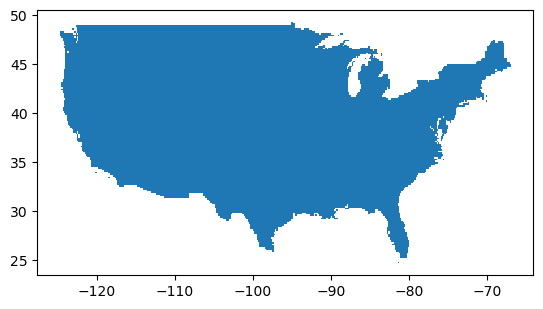

In [801]:
#And plot to check:
gdf_all.plot()

### What about different temperature levels to vector?

- Let's divide the temperature raster into levels 1, 2, and 3, corresponding to "cold," "medium." and "warm"
- We'll arbitrarily choose 8 and 15 degrees Celsius for the cutoffs

In [827]:
#Reload:
#####

with rasterio.open('USA_Mean_Temp_10minutes.tif') as src:
    raster_map = src.read(1, masked=True)
    
#And let's fill our mask with np.nan
######
raster_map = raster_map.filled(np.nan)

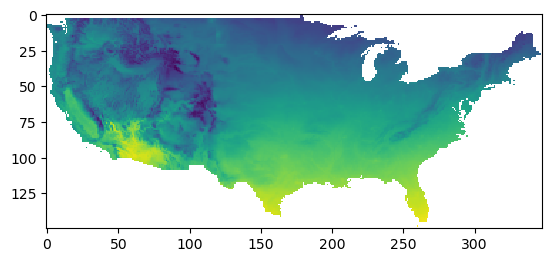

In [828]:
show(raster_map, interpolation='none');

In [829]:
#Remake our raster_map2 as a helper:
#######

raster_map2 = raster_map.copy()

In [830]:
raster_map = raster_map.round()

In [806]:
#And now tag everything either 1, 2, or 3
##########

raster_map[raster_map2 < 8] = 1
raster_map[(raster_map2 >= 8) & (raster_map2 < 15)] = 2
raster_map[raster_map2 >= 15] = 3

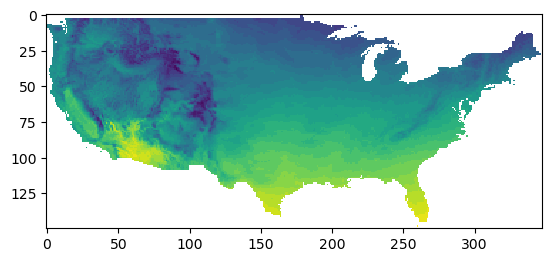

In [831]:
#Did it work??
###

show(raster_map, interpolation='none');

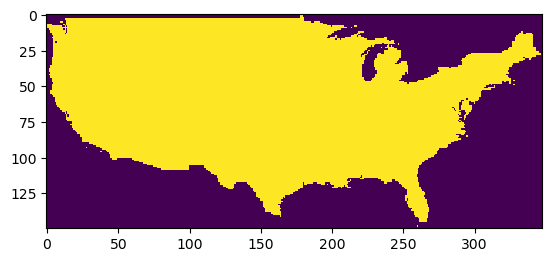

In [832]:
#Recover our mask:
######

msk = ~np.isnan(raster_map)

show(msk, interpolation='none');

In [833]:
#Now, create our shape generator again:
#####

#Note that msk was created above
raster_shape = features.shapes(raster_map, mask=msk) #, transform=src.transform)

In [820]:
#Run this cell a few times to see all the polygons created:

#NOTE: Now we care about the second value! Either 1, 2, or 3
x = next(raster_shape)
x

({'type': 'Polygon',
  'coordinates': [[(5.0, 8.0),
    (7.0, 8.0),
    (7.0, 9.0),
    (8.0, 9.0),
    (8.0, 8.0),
    (9.0, 8.0),
    (9.0, 9.0),
    (11.0, 9.0),
    (11.0, 12.0),
    (9.0, 12.0),
    (9.0, 13.0),
    (7.0, 13.0),
    (7.0, 12.0),
    (6.0, 12.0),
    (6.0, 11.0),
    (5.0, 11.0),
    (5.0, 10.0),
    (4.0, 10.0),
    (4.0, 9.0),
    (5.0, 9.0),
    (5.0, 8.0)]]},
 1.0)

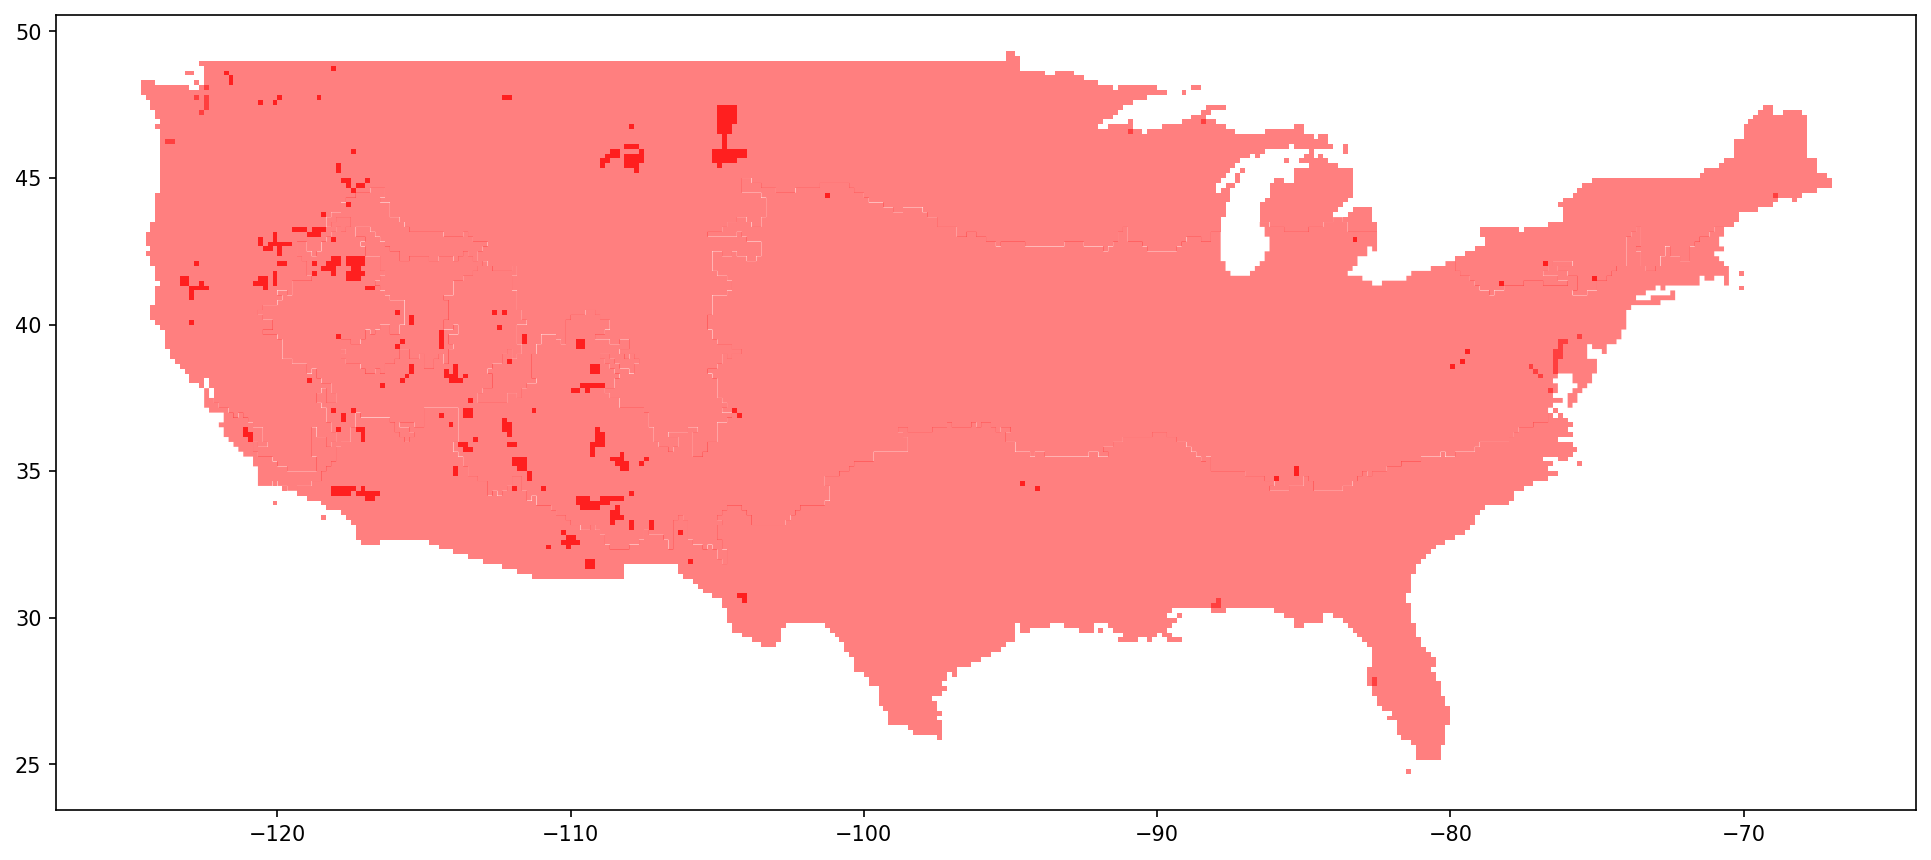

In [821]:
#Let's plot all our shapes, once again:
###########

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=150)

raster_shape = features.shapes(raster_map, mask=msk, transform=src.transform)


for x in raster_shape:
    for l in x[0]['coordinates']:
        #Turn to polygon
        p = Polygon(l)

        #Cast as GeoDataFrame
        p2 = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[1])

        #And plot:
        #We are including interior stuff here:
        p2.plot(ax=ax1, alpha=.5, facecolor='red')

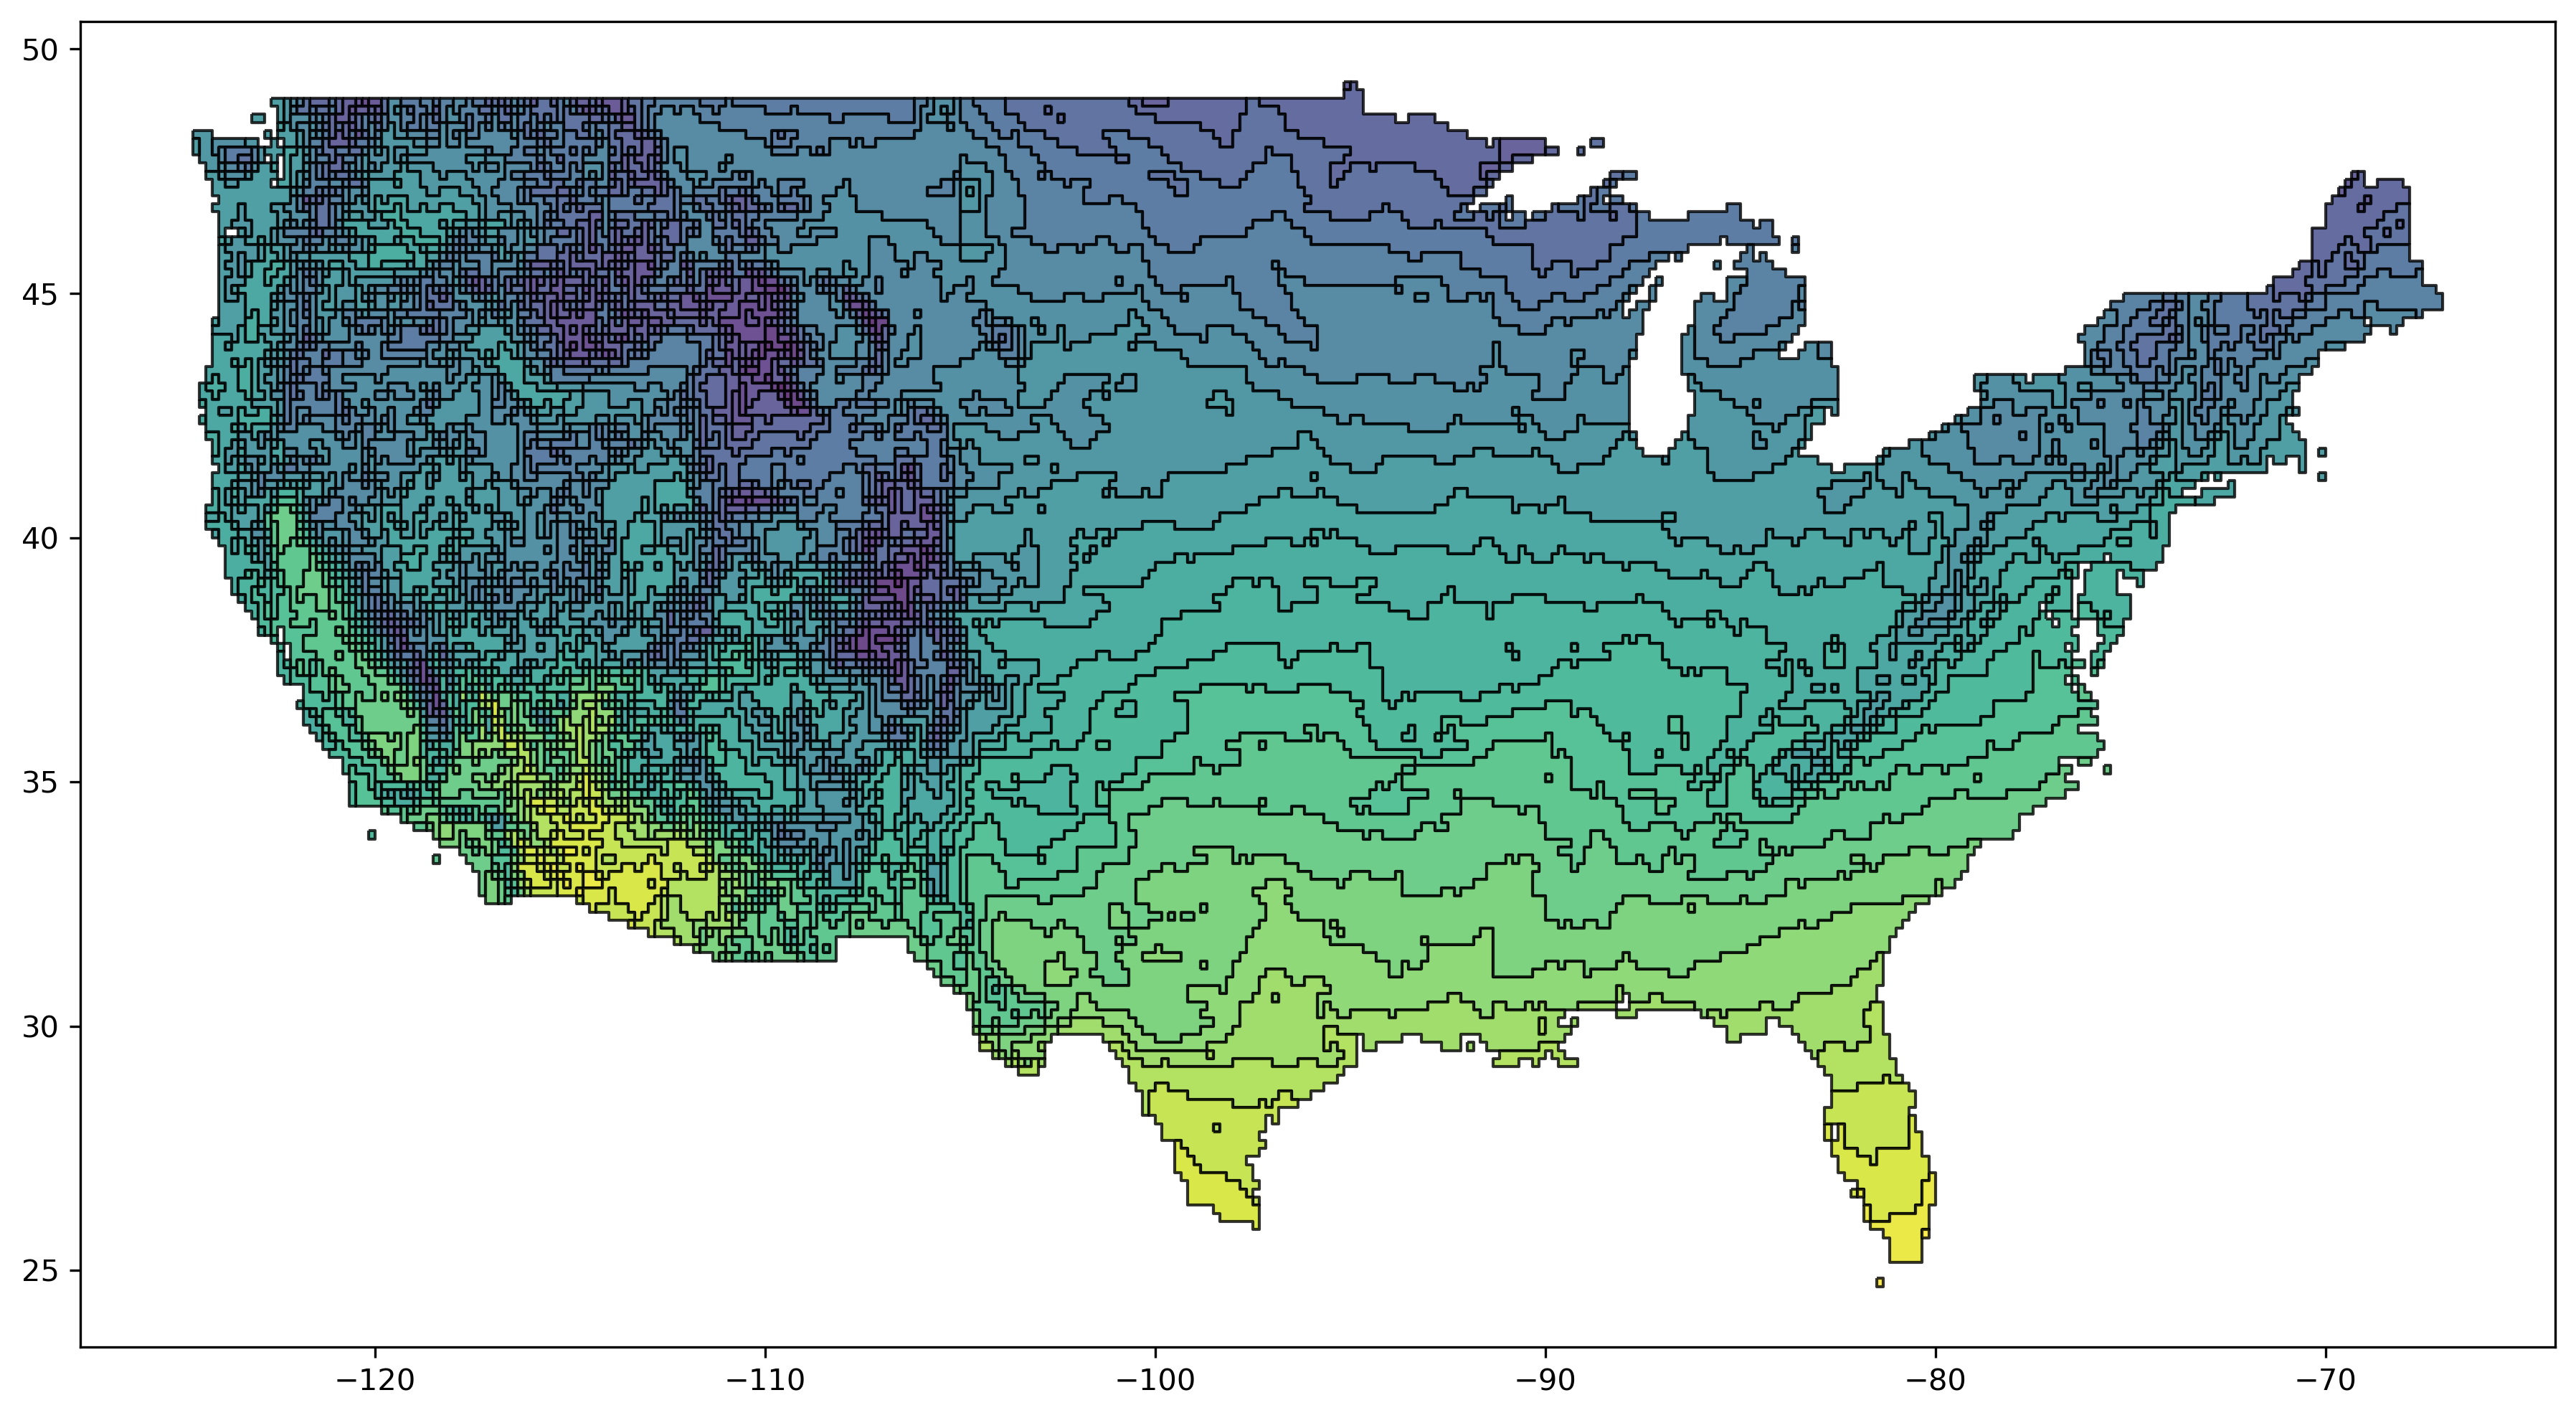

In [834]:
#Just copy and paste above code to build our vectors: With slight modifications
######################

#Use GeoPandas to build up a geodataframe
# Use overlay difference to subtract off interiors
###

#Get our generator
raster_shape = features.shapes(raster_map, mask=msk, transform=src.transform)

#Make an empty GeoDataFrame:
gdf = gpd.GeoDataFrame(columns={'geometry':[]}, crs=4326)


#Iterate through the shapes
for x in raster_shape:
    
    #If i > 0, then an interior polygon to subtract off
    for i, k in enumerate(x[0]['coordinates']):
            
        #Make polygon
        p = Polygon(k)
        
        #If i > 0, then we are subtracting off geometries, and already made p_master
        if (i == 0):
            #Make p_master:
            p_master = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[i], crs=4326)
        else:
            #Subtract off an interior polygon:
            df_subtract = gpd.GeoDataFrame({'val':x[1], 'geometry':p}, index=[i], crs=4326)
            p_master = p_master.overlay(df_subtract, how='difference')

            
        #Only append to gdf if last iteration:
        if (i == len(x[0]['coordinates']) - 1):
            gdf = gdf.append(p_master)

#Can plot our final result!
#########

fig, ax1 = plt.subplots(1, 1, figsize=(16, 8), dpi=300)
gdf.plot(ax=ax1, column='val', linewidth=1, edgecolor='black', alpha=.8);


In [823]:
#Our result?
####

gdf

,geometry,val
0,"POLYGON ((-119.50000 49.00000, -119.50000 48.6...",2.0
0,"POLYGON ((-118.16667 48.83333, -118.16667 48.6...",2.0
0,"POLYGON ((-105.50000 49.00000, -105.33333 49.0...",2.0
0,"POLYGON ((-123.16667 48.66667, -123.16667 48.5...",2.0
0,"POLYGON ((-121.83333 48.66667, -121.83333 48.5...",2.0
...,...,...
0,"POLYGON ((-104.33333 30.83333, -104.33333 30.6...",2.0
0,"POLYGON ((-89.33333 30.16667, -89.33333 30.000...",3.0
0,"POLYGON ((-92.00000 29.66667, -92.00000 29.500...",3.0
0,"POLYGON ((-117.33333 36.50000, -117.33333 37.0...",3.0


In [824]:
#Can dissolve based on val:
#############

gdf_all = gdf.dissolve(by='val', aggfunc='first')
gdf_all

,geometry
val,
1.0,"MULTIPOLYGON (((-118.00000 37.00000, -118.1666..."
2.0,"MULTIPOLYGON (((-120.00000 33.83333, -120.1666..."
3.0,"MULTIPOLYGON (((-118.50000 33.50000, -118.3333..."


In [825]:
#Reset the index:
gdf_all = gdf_all.reset_index()
gdf_all

,val,geometry
0,1.0,"MULTIPOLYGON (((-118.00000 37.00000, -118.1666..."
1,2.0,"MULTIPOLYGON (((-120.00000 33.83333, -120.1666..."
2,3.0,"MULTIPOLYGON (((-118.50000 33.50000, -118.3333..."


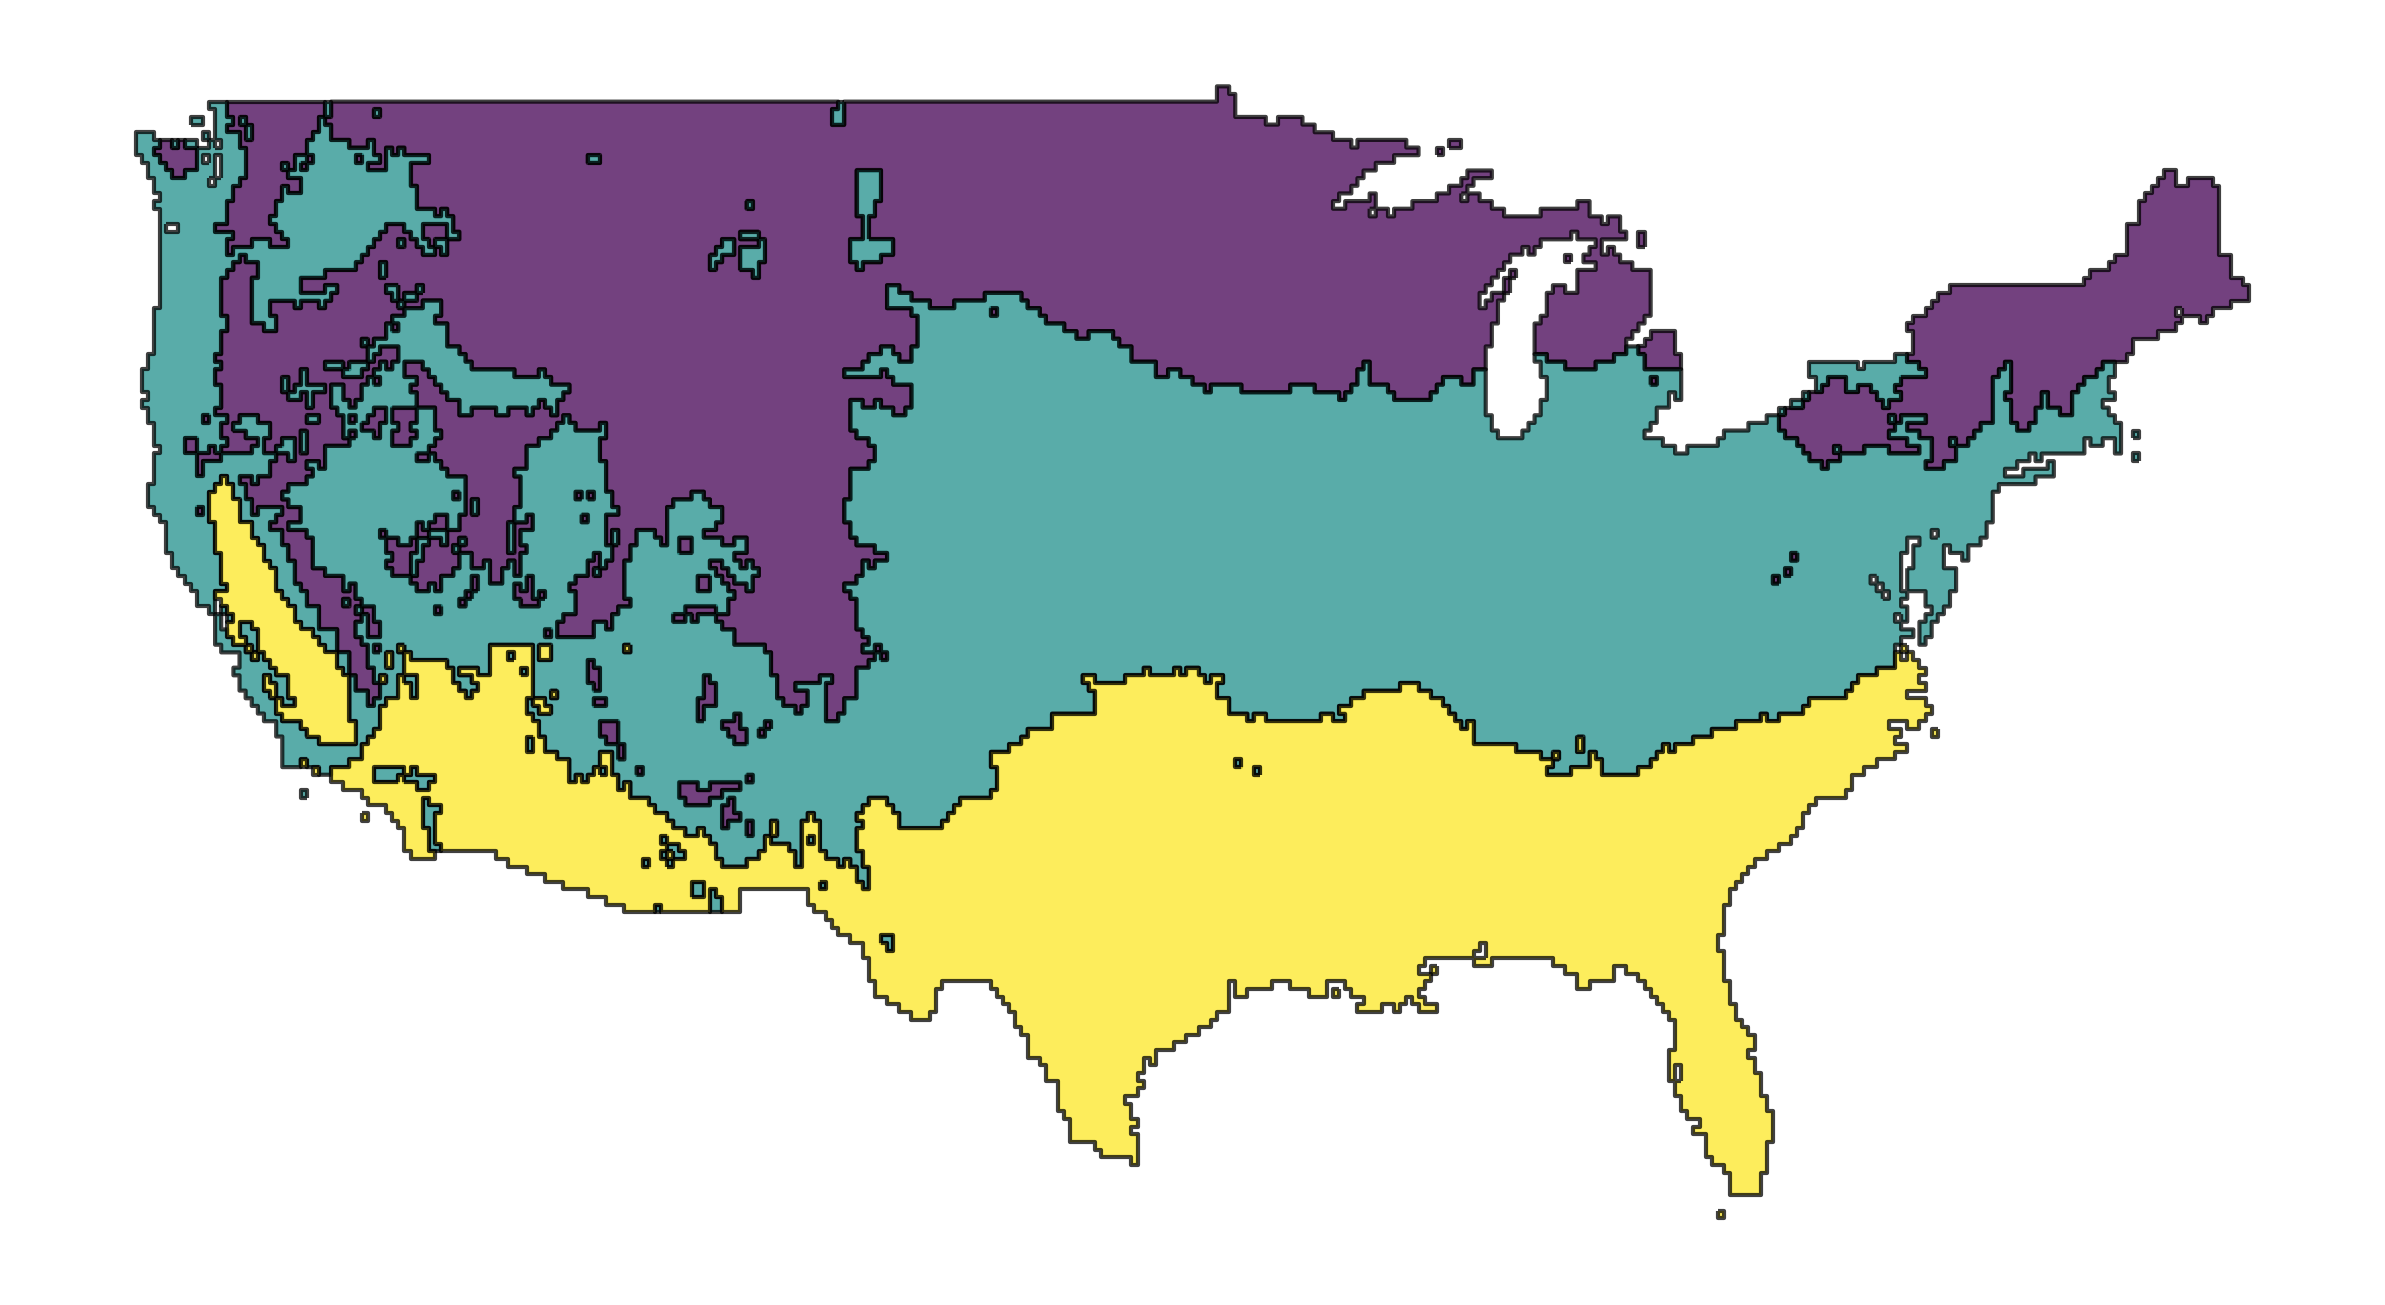

In [826]:
#And plot once more:
########

fig, ax1 = plt.subplots(1, 1, figsize=(10, 8), dpi=300)

gdf_all.plot(ax=ax1, column='val', linewidth=1, edgecolor='black', alpha=.75)
ax1.set_axis_off()

## Vector to Raster

- Now, let's start with the vector of mean state temperatures that we constructed in the previous lecture
- (We had this saved to file)
- Let us convert these mean temperatures into a raster

In [835]:
### Reload our vectors:

gdf = gpd.read_file('CONUS_Temp_Vectors/CONUS_Temp_Vectors.shp')

#Recall that min, max, and mean are the min, max, and mean temperature for the state
gdf

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,min,max,mean,count,geometry
0,0,56,01779807,0400000US56,56,WY,Wyoming,00,251458712294,1867503716,-4.966667,9.470834,5.102762,449244,"POLYGON ((-1180474.958 2539524.670, -1179737.4..."
1,2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,7.933333,14.500000,12.395642,45338,"MULTIPOLYGON (((1722852.650 1842859.018, 17227..."
2,4,05,00068085,0400000US05,05,AR,Arkansas,00,134660767709,3121950081,12.820833,17.879168,15.763937,244326,"POLYGON ((122656.347 1495564.869, 122680.321 1..."
3,5,38,01779797,0400000US38,38,ND,North Dakota,00,178694310772,4414779956,1.950000,8.345834,4.900217,324727,"POLYGON ((-596854.999 2898545.980, -596834.890..."
4,6,10,01779781,0400000US10,10,DE,Delaware,00,5046731559,1399179670,11.533334,13.541667,12.947156,9056,"MULTIPOLYGON (((1727522.772 2019061.203, 17277..."
5,8,35,00897535,0400000US35,35,NM,New Mexico,00,314198560947,726482113,-1.075000,18.091667,11.937095,558471,"POLYGON ((-1231344.076 1018550.430, -1231015.8..."
6,9,49,01455989,0400000US49,49,UT,Utah,00,213355072799,6529973239,-2.641667,18.312500,8.827760,389949,"POLYGON ((-1569460.993 1766705.668, -1569165.1..."
7,10,54,01779805,0400000US54,54,WV,West Virginia,00,62266298634,489204185,6.475000,13.187500,10.834242,111289,"POLYGON ((1155315.949 1763100.052, 1155325.846..."
8,11,20,00481813,0400000US20,20,KS,Kansas,00,211753717642,1345767737,10.283334,14.620833,12.486269,377904,"POLYGON ((-511746.504 1903622.041, -500341.080..."
9,12,13,01705317,0400000US13,13,GA,Georgia,00,149486624386,4418360134,10.370833,20.762501,17.541243,270047,"MULTIPOLYGON (((1390721.939 1022647.032, 13908..."


#### Warmup: Just rasterize the whole GeoDataFrame

In [837]:
#Align our CRS first:
gdf = gdf.to_crs(src.crs)

<AxesSubplot: >

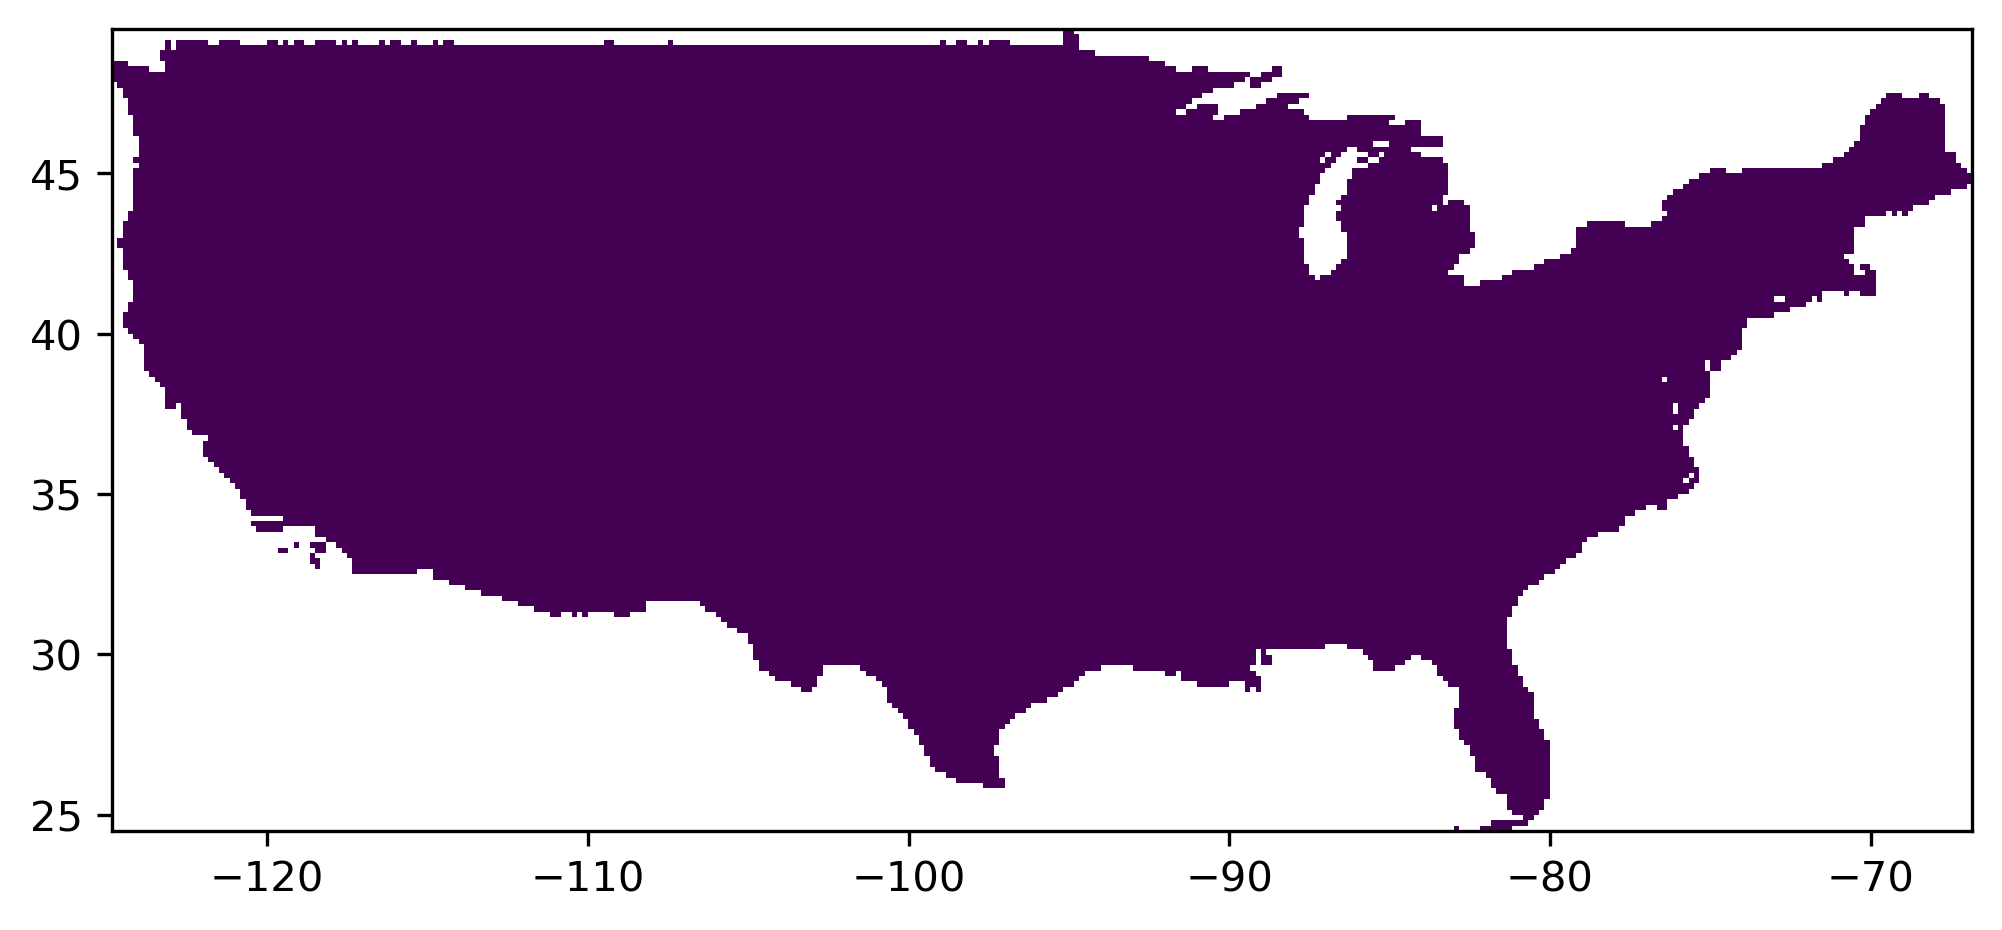

In [838]:
#Here we just have 1s as value for each shape:

image = features.rasterize(
    [(shape, 1) for shape in gdf['geometry']],
    out_shape=src.shape,
    transform=src.transform,
    fill=np.nan,
    all_touched=True,
    dtype=rasterio.float32)


#Plot our new image:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
show(image, transform=src.transform, ax=ax1, interpolation='none')

#### Now rasterize the temperatures:

<AxesSubplot: >

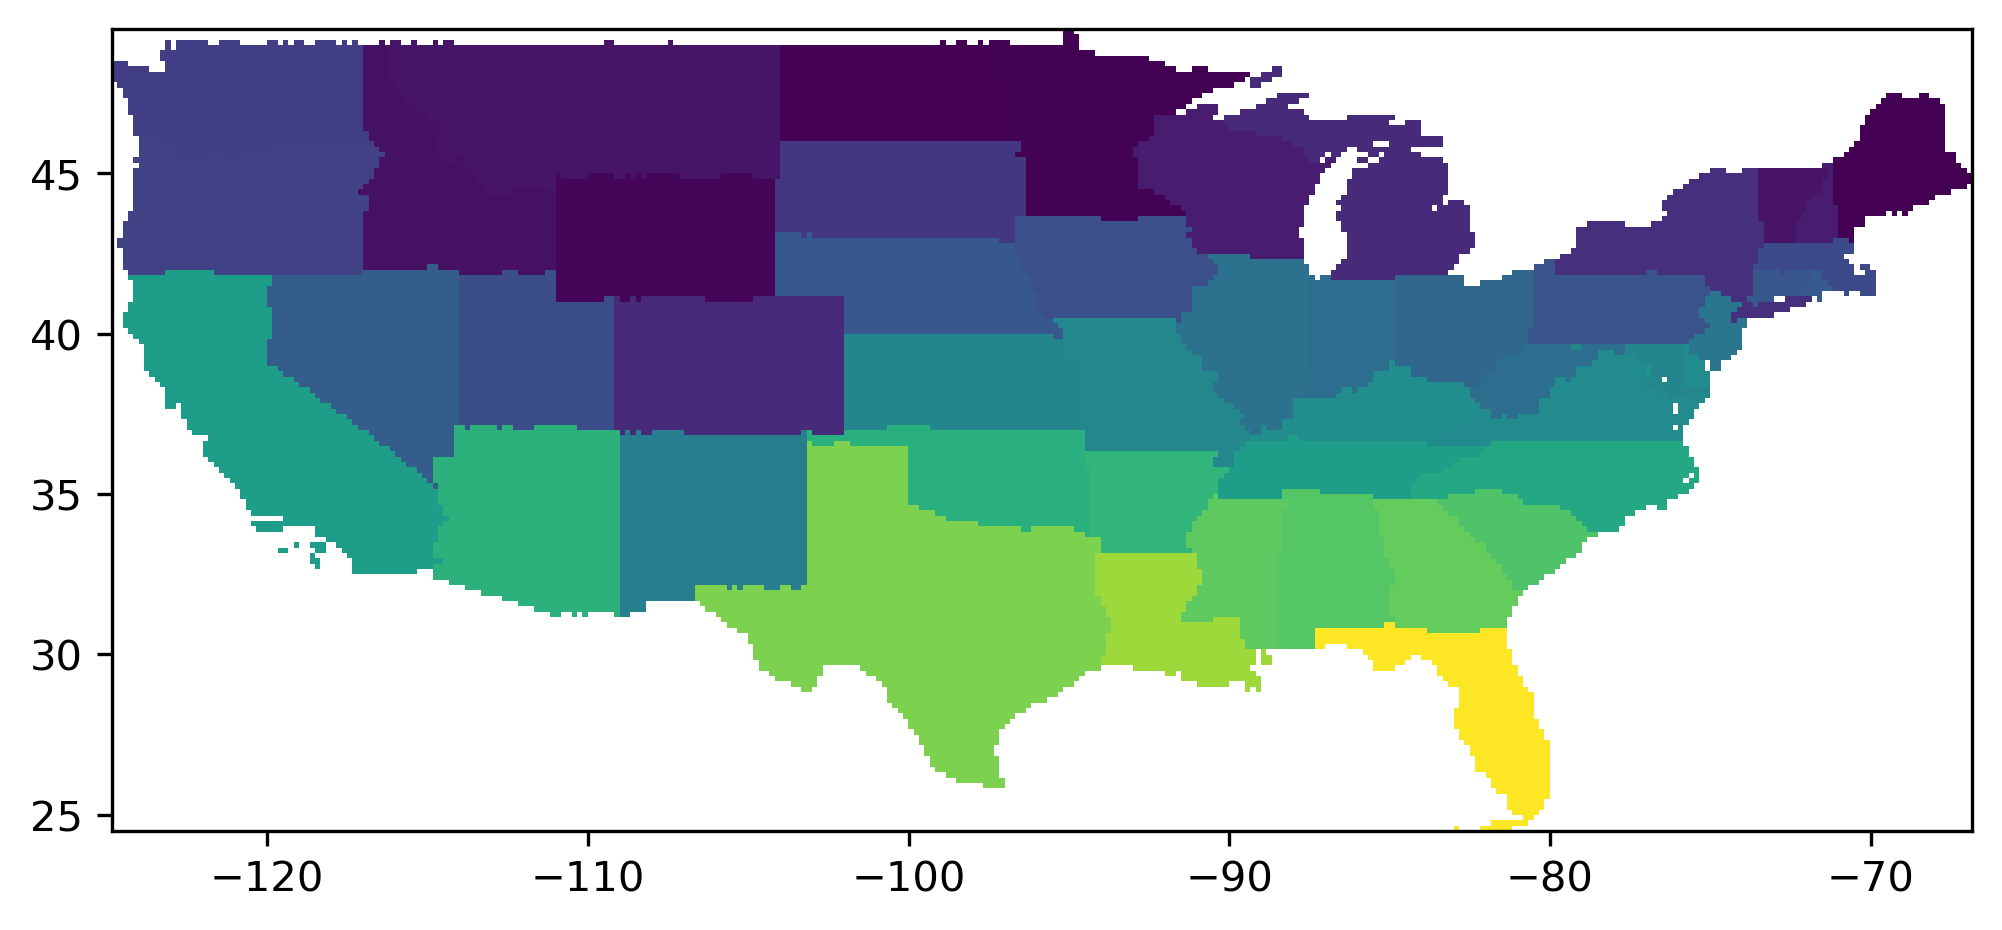

In [839]:
#Get the mean temperature for each state:
#########

image = features.rasterize(
    [(shape, x) for (shape,x) in zip(gdf['geometry'], gdf['mean'])],
    out_shape=src.shape,
    transform=src.transform,
    fill=np.nan,
    all_touched=True,
    dtype=rasterio.float32)


fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
show(image, transform=src.transform, ax=ax1, interpolation='none')

## Finally: Downscale/Upscale a Raster

- Adopted from https://rasterio.readthedocs.io/en/latest/topics/resampling.html

In [858]:
#Here is our template...
###########

from rasterio.enums import Resampling

#What Factor to Down/Upscale by?
upscale_factor = 1/4

with rasterio.open("USA_Mean_Temp_10Minutes.tif") as dataset2:

    # Resample data to target shape
    data = dataset2.read(masked=True,
        out_shape=(
            dataset2.count,
            int(dataset2.height * upscale_factor),
            int(dataset2.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # Ccale image transform
    transform = dataset2.transform * dataset2.transform.scale(
        (dataset2.width / data.shape[-1]),
        (dataset2.height / data.shape[-2])
    )

In [859]:
data.shape

(1, 37, 87)

<AxesSubplot: >

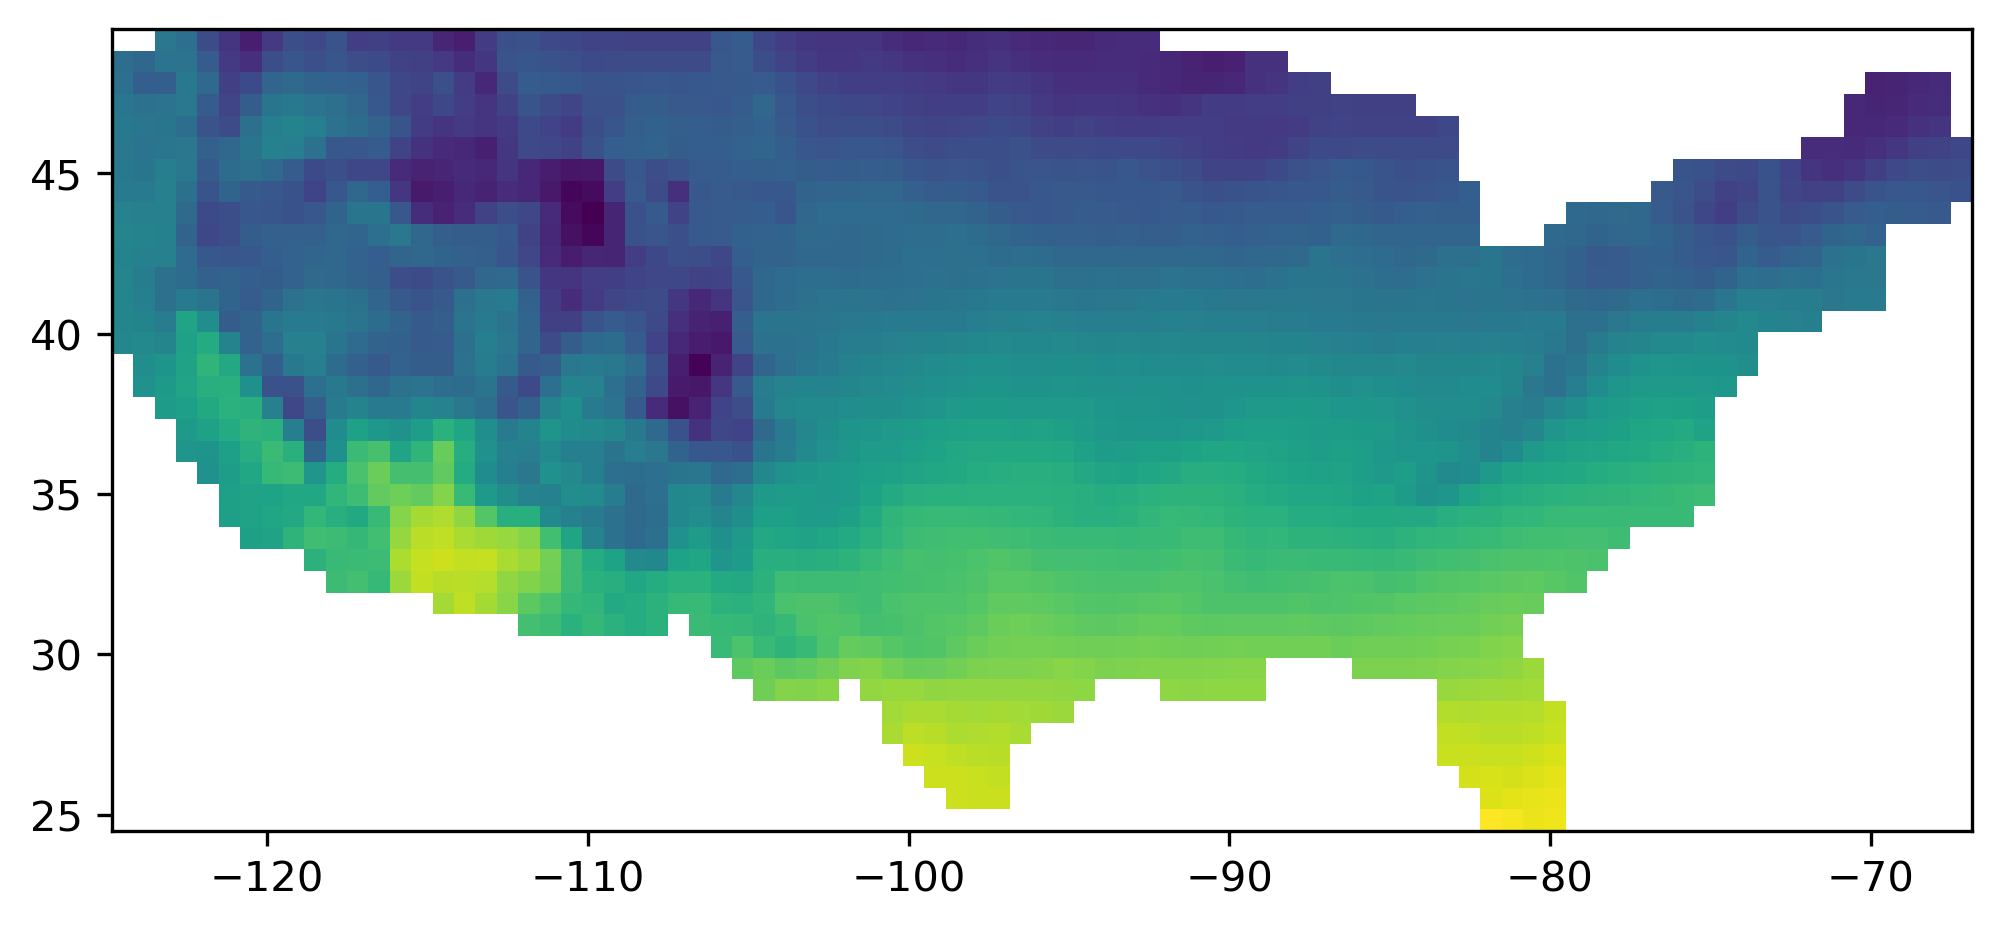

In [860]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
show(data, transform=transform, ax=ax1, interpolation='none')